Added solution for Case-4: Heat Equation with Dirichlet Boundary Conditions

- Solved the heat equation using finite difference method.
- Applied the given initial and boundary conditions.
- Visualized temperature distribution over time.


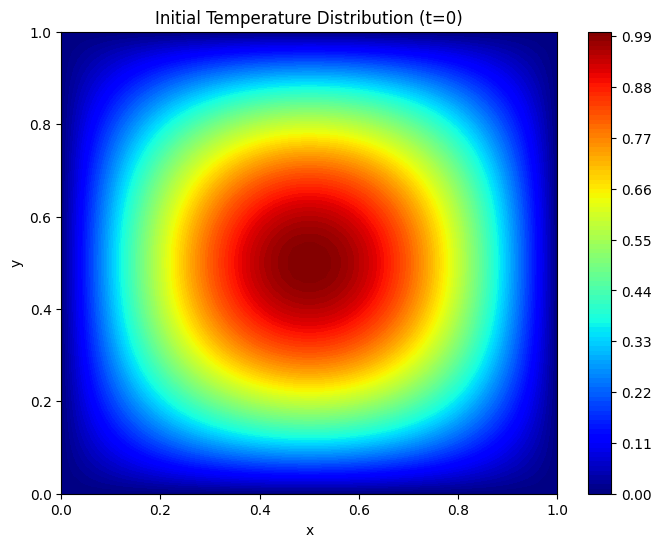

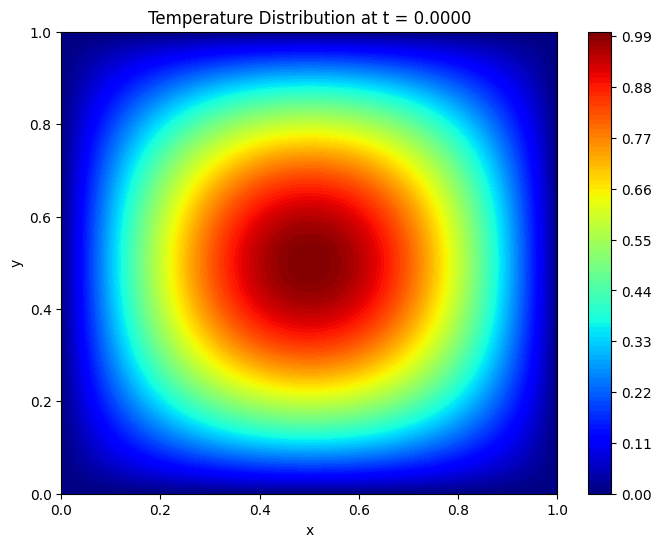

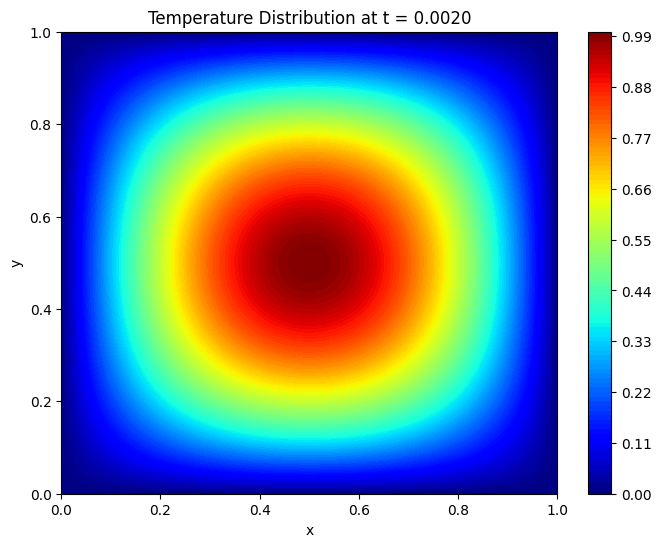

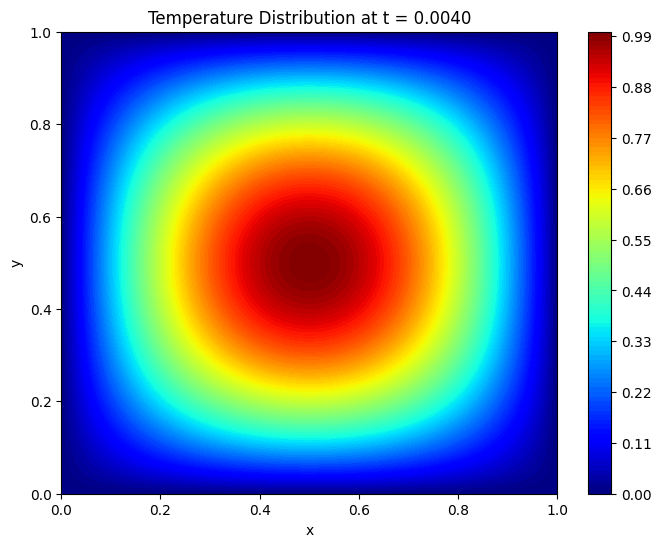

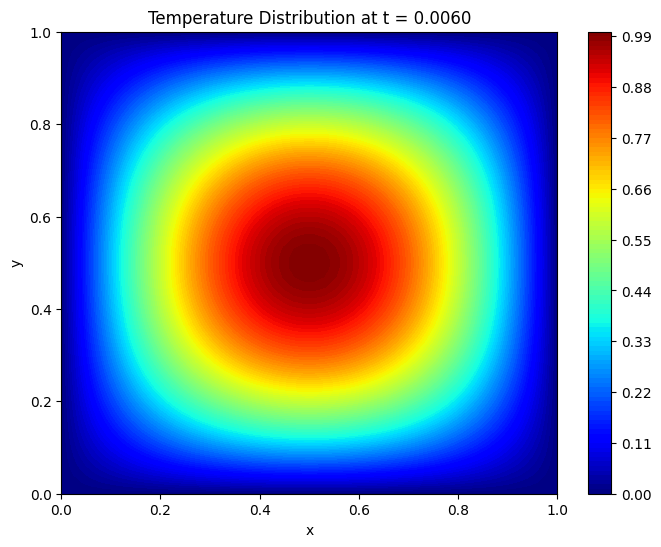

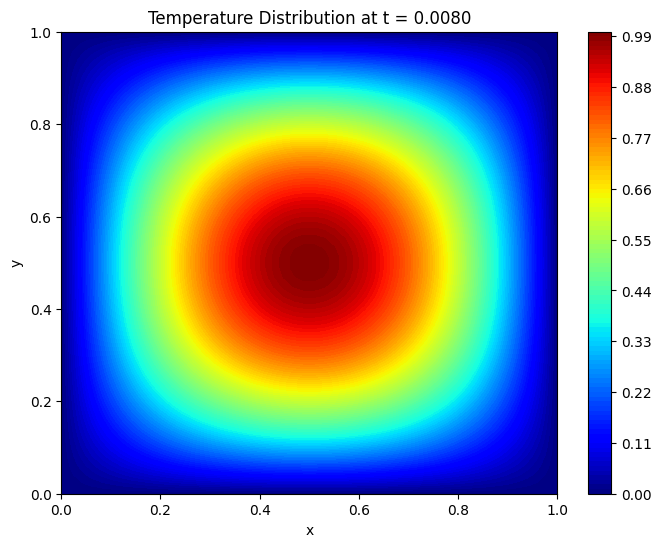

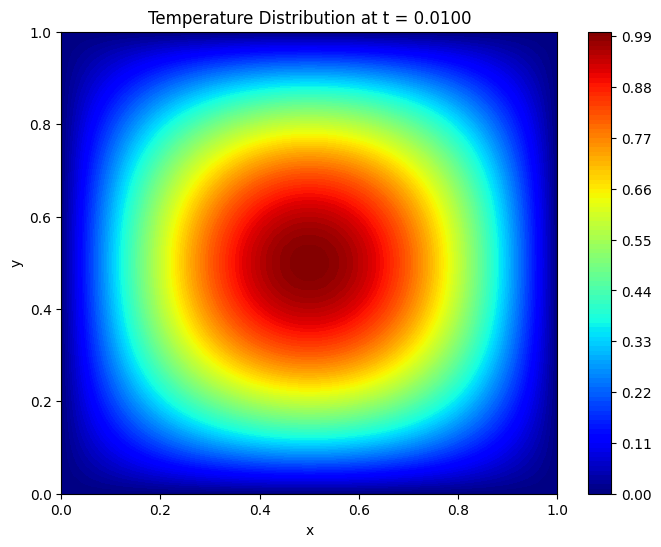

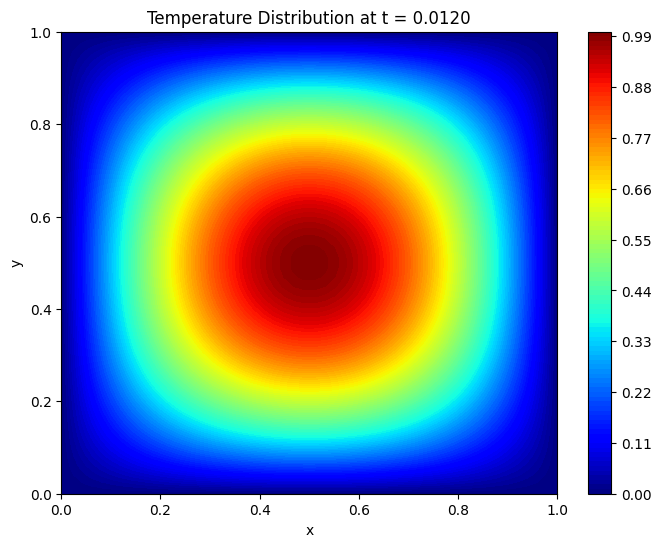

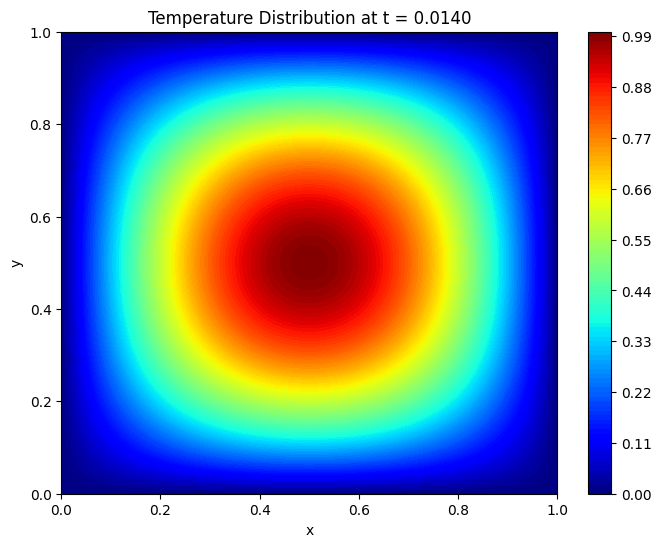

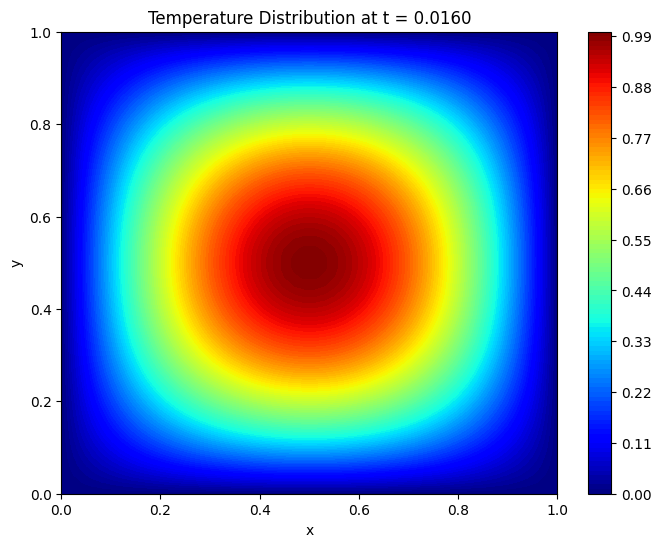

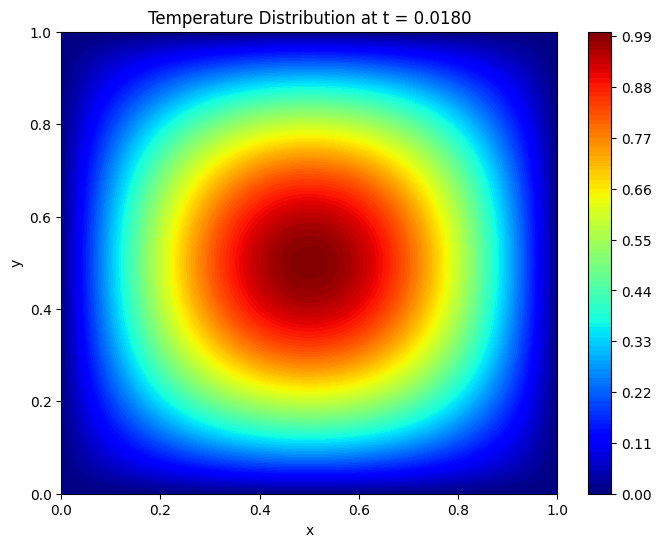

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid size and number of points
nx = 50  # number of grid points in x direction
ny = 50  # number of grid points in y direction
nt = 200  # number of time steps
alpha = 0.01  # thermal diffusivity
dx = 1.0 / (nx - 1)  # grid spacing in x direction
dy = 1.0 / (ny - 1)  # grid spacing in y direction
dt = 0.0001  # time step size

# Stability condition (for explicit method)
stability_factor = alpha * dt / (dx**2)
if stability_factor > 0.25:
    print("Warning: Stability condition violated. Consider reducing dt or increasing dx/dy.")
    
# Initialize the temperature field (T) with the initial condition
T = np.zeros((nx, ny))
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)

# Initial condition: T(x, y, 0) = sin(pi * x) * sin(pi * y)
T = np.sin(np.pi * X) * np.sin(np.pi * Y)

# Set up the plot for the initial state
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, T, cmap='jet', levels=100)
plt.colorbar()
plt.title("Initial Temperature Distribution (t=0)")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Time-stepping loop for the finite difference method
for t in range(nt):
    T_new = T.copy()  # Create a copy to store the updated values
    
    # Update the temperature field using finite difference
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            T_new[i, j] = T[i, j] + stability_factor * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1] - 4 * T[i, j])
    
    # Update the temperature field
    T = T_new.copy()
    
    # Plot the result at selected time steps
    if t % 20 == 0:  # Plot every 20th time step
        plt.figure(figsize=(8, 6))
        plt.contourf(X, Y, T, cmap='jet', levels=100)
        plt.colorbar()
        plt.title(f"Temperature Distribution at t = {t * dt:.4f}")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
